In [6]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import numpy as np

In [4]:
import pandas as pd

df = pd.read_parquet('/s3/misha/data_dir/PMC_patients/full_texts_PMC-Patients-V2.parquet', engine='pyarrow')

In [5]:
df['len_text'] = df['full_text'].apply(lambda x: len(x))

In [6]:
df_unique = df.drop_duplicates(subset=['full_text'])
df_unique_filtered = df_unique[(df_unique['len_text'] > 1000) & (df_unique['len_text'] < 50000)]

In [7]:
len(df_unique), len(df_unique_filtered)

(208357, 207500)

In [14]:
df_unique.head(3)

,PMID,patient_uid,title,full_text,len_text
0,15268761,497050-1,Echocardiographic assessment and percutaneous ...,Echocardiographic assessment and percutaneous ...,9599
3,15272940,503399-1,A unique dedifferentiated tumor of the retrope...,A unique dedifferentiated tumor of the retrope...,10917
4,15285782,509249-1,Adenoid cystic carcinoma of the parotid metast...,Adenoid cystic carcinoma of the parotid metast...,11163


In [10]:
df_unique.shape

(208357, 5)

In [24]:
df_unique['len_text'].min(), df_unique['len_text'].max()

(7, 2273426)

In [25]:
df_unique_filtered['len_text'].min(), df_unique_filtered['len_text'].max()

(1015, 49983)

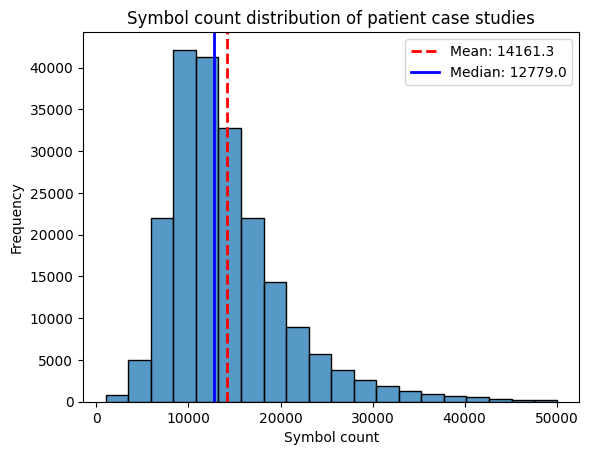

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_unique_filtered['len_text'] is your dataset
data = df_unique_filtered['len_text']

# Calculate mean and median
mean_value = np.mean(data)
median_value = np.median(data)

# Plot histogram
sns.histplot(data, kde=False, bins=20)

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.1f}')
plt.axvline(median_value, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_value:.1f}')

# Labels and title
plt.xlabel('Symbol count')
plt.ylabel('Frequency')
plt.title('Symbol count distribution of patient case studies')
plt.legend()  # Show legend

# Display the plot
plt.show()